In [1]:
%pip install split-folders

In [1]:
import os
import splitfolders

input_dir = os.path.abspath(r"C:\Users\SAIVARUN\OneDrive\Desktop\project\updateddata\imgdata")
splitfolders.ratio(input_dir, output="outdata", seed=1337, ratio=(.8, .2), group_prefix=None)



Copying files: 1445 files [03:53,  6.19 files/s]


In [2]:
import numpy as np
from re import sub
import tensorflow as tf
from tensorflow.keras import metrics

import matplotlib.colors as mcolors
from sklearn.metrics import confusion_matrix
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
METRICS = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.CategoricalAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc')
]

In [4]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)

In [5]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('./outdata/train',
                                                 target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator=train_datagen.flow_from_directory('./outdata/val',
                                                     target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 1286 images belonging to 2 classes.
Found 421 images belonging to 2 classes.


In [6]:
classes = train_generator.class_indices
class_list = list(classes.keys())

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

IMG_SHAPE = (224, 224, 3)

inputs = Input(shape=IMG_SHAPE)


x = Conv2D(16, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.66)(x)

x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.66)(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.80)(x)

outputs = Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


In [10]:
model.compile(optimizer='Nadam',loss='categorical_crossentropy',metrics=METRICS)

In [11]:
step_size_train=train_generator.n//train_generator.batch_size
model_history=model.fit(train_generator,
                    validation_data =val_generator,
                   steps_per_epoch=step_size_train,
                   epochs=4)

Epoch 1/4
40/40 [==============================] - 354s 9s/step - loss: 0.5741 - tp: 775.0000 - fp: 511.0000 - tn: 775.0000 - fn: 511.0000 - accuracy: 0.6026 - precision: 0.6026 - recall: 0.6026 - auc: 0.6879 - val_loss: 0.6427 - val_tp: 296.0000 - val_fp: 125.0000 - val_tn: 296.0000 - val_fn: 125.0000 - val_accuracy: 0.7031 - val_precision: 0.7031 - val_recall: 0.7031 - val_auc: 0.7831
Epoch 2/4
40/40 [==============================] - 345s 9s/step - loss: 0.5069 - tp: 767.0000 - fp: 487.0000 - tn: 767.0000 - fn: 487.0000 - accuracy: 0.6116 - precision: 0.6116 - recall: 0.6116 - auc: 0.7270 - val_loss: 0.6299 - val_tp: 296.0000 - val_fp: 125.0000 - val_tn: 296.0000 - val_fn: 125.0000 - val_accuracy: 0.7031 - val_precision: 0.7031 - val_recall: 0.7031 - val_auc: 0.8440
Epoch 3/4
40/40 [==============================] - 342s 9s/step - loss: 0.4924 - tp: 817.0000 - fp: 437.0000 - tn: 817.0000 - fn: 437.0000 - accuracy: 0.6515 - precision: 0.6515 - recall: 0.6515 - auc: 0.7594 - val_loss:

In [13]:
print(model_history.history)

{'loss': [0.5740762948989868, 0.506870687007904, 0.49240151047706604, 0.48713743686676025], 'tp': [775.0, 767.0, 817.0, 849.0], 'fp': [511.0, 487.0, 437.0, 405.0], 'tn': [775.0, 767.0, 817.0, 849.0], 'fn': [511.0, 487.0, 437.0, 405.0], 'accuracy': [0.6026438474655151, 0.6116427183151245, 0.6515151262283325, 0.6770334839820862], 'precision': [0.6026438474655151, 0.6116427183151245, 0.6515151262283325, 0.6770334839820862], 'recall': [0.6026438474655151, 0.6116427183151245, 0.6515151262283325, 0.6770334839820862], 'auc': [0.6878920197486877, 0.726991593837738, 0.759432315826416, 0.7800874710083008], 'val_loss': [0.6427368521690369, 0.6299152374267578, 0.6262428760528564, 0.5612768530845642], 'val_tp': [296.0, 296.0, 293.0, 346.0], 'val_fp': [125.0, 125.0, 128.0, 75.0], 'val_tn': [296.0, 296.0, 293.0, 346.0], 'val_fn': [125.0, 125.0, 128.0, 75.0], 'val_accuracy': [0.7030878663063049, 0.7030878663063049, 0.6959620118141174, 0.8218527436256409], 'val_precision': [0.7030878663063049, 0.703087

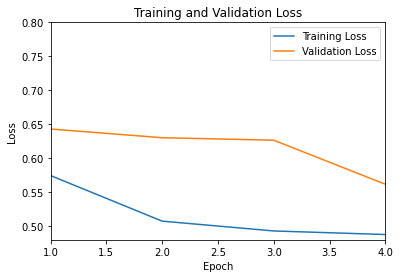

<Figure size 432x288 with 0 Axes>

In [27]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlim([1, 4])  
plt.ylim([min(plt.ylim()),0.8])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Loss.png")

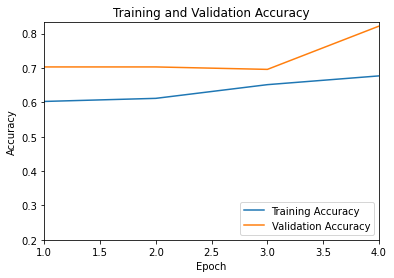

<Figure size 432x288 with 0 Axes>

In [25]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

plt.plot(range(1,len(acc)+1),acc, label='Training Accuracy')
plt.plot(range(1,len(val_acc)+1),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([1,4])
plt.ylim([0.2,max(plt.ylim())])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Accuracy.png")


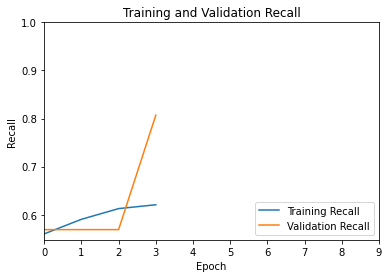

<Figure size 432x288 with 0 Axes>

In [39]:
rec = model_history.history['recall']
val_rec = model_history.history['val_recall']

plt.plot(rec, label='Training Recall')
plt.plot(val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel("Recall")
plt.xlim([0,4])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Recall.png")

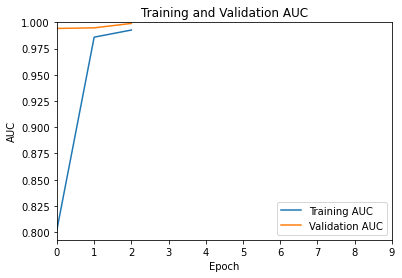

<Figure size 432x288 with 0 Axes>

In [19]:
auc = model_history.history['auc']
val_auc = model_history.history['val_auc']

plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel("AUC")
plt.xlim([0,4])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Auc.png")

14/14 [==============================] - 67s 5s/step


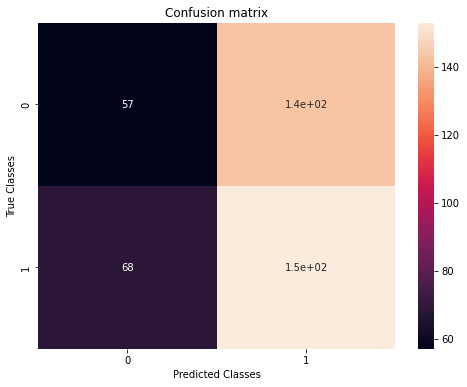

In [16]:
p = model.predict(val_generator)
p = np.argmax(p, axis=1)
y_true = val_generator.classes
c = confusion_matrix(p, y_true)

plt.figure(figsize=(8,6))
plt.title('Confusion matrix')
sns.heatmap(c, annot=True)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.plot()
plt.savefig("model_Confusion_matrix.png")

In [21]:
model.save("simplemodel.h5")